Using the dataset folder of drive.\
Lable encoded masked faces as 1 and without mask faces as 0.

Loading of dataset and converting to numpy array using cv2 library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2, os
data = []
target = []
path1 =  "/content/drive/MyDrive/dataset/with_mask"
path2 = "/content/drive/MyDrive/dataset/without_mask"
img_names1 = os.listdir(path1)
img_names2 = os.listdir(path2)
for img_name in img_names1:
  path = os.path.join(path1,img_name)
  img = cv2.imread(path)
  try:
    #gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(img, (100,100))
    data.append(resized_img)
    target.append(1)
  except Exception as e:
    pass
for img_name in img_names2:
  path = os.path.join(path2,img_name)
  img = cv2.imread(path)
  try:
    #gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(img, (100,100))
    data.append(resized_img)
    target.append(0)
  except Exception as e:
    pass

In [ ]:
import numpy as np
import pandas as pd
data = np.array(data)
target = np.array(target)
data.shape

(1386, 100, 100, 3)

In [ ]:
data[0].shape

(100, 100, 3)

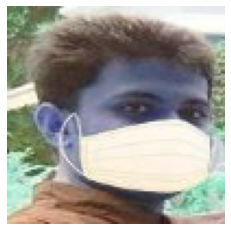

In [ ]:
# Showing a sample image
import matplotlib.pyplot as plt
plt.axis('off')
plt.imshow(data[1])

Using convolutional neural network for image classification

In [ ]:
from keras import layers
from keras.layers import Conv2D, Dense, Input, MaxPooling2D
from keras.models import Sequential

In [ ]:
data = data/255
data[0]

array([[[0.86666667, 0.84705882, 0.82745098],
        [0.84705882, 0.83529412, 0.81960784],
        [0.85882353, 0.84705882, 0.83137255],
        ...,
        [0.84705882, 0.83529412, 0.83137255],
        [0.85882353, 0.83921569, 0.83529412],
        [0.85882353, 0.83921569, 0.83137255]],

       [[0.86666667, 0.85098039, 0.83137255],
        [0.84705882, 0.83529412, 0.81960784],
        [0.85490196, 0.84705882, 0.83137255],
        ...,
        [0.84705882, 0.83529412, 0.83137255],
        [0.85490196, 0.83921569, 0.83529412],
        [0.85882353, 0.83921569, 0.83137255]],

       [[0.86666667, 0.85098039, 0.83137255],
        [0.84705882, 0.83529412, 0.81960784],
        [0.85882353, 0.84705882, 0.83137255],
        ...,
        [0.84705882, 0.83529412, 0.83137255],
        [0.85882353, 0.83921569, 0.83529412],
        [0.85882353, 0.83921569, 0.83137255]],

       ...,

       [[0.98039216, 1.        , 0.99607843],
        [0.98431373, 1.        , 1.        ],
        [0.99215686, 1

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.2)
print(x_train.shape)

(1108, 100, 100, 3)


In [ ]:
# Using Sequential model
model = Sequential([
                    Conv2D(16,3,padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    Conv2D(32,3, padding= 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    Conv2D(64,3, padding= 'same', activation = 'relu'),
                    layers.MaxPooling2D(),

                    layers.Flatten(),
                    Dense(128, activation = 'relu'),
                    Dense(1, activation = 'sigmoid')
])
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
32/32 [==============================] - 10s 295ms/step - loss: 0.8543 - accuracy: 0.5351 - val_loss: 0.5706 - val_accuracy: 0.7027
Epoch 2/10
32/32 [==============================] - 9s 280ms/step - loss: 0.4920 - accuracy: 0.7599 - val_loss: 0.3050 - val_accuracy: 0.8829
Epoch 3/10
32/32 [==============================] - 9s 283ms/step - loss: 0.2059 - accuracy: 0.9381 - val_loss: 0.1208 - val_accuracy: 0.9459
Epoch 4/10
32/32 [==============================] - 9s 282ms/step - loss: 0.1320 - accuracy: 0.9569 - val_loss: 0.1695 - val_accuracy: 0.9189
Epoch 5/10
32/32 [==============================] - 9s 282ms/step - loss: 0.0946 - accuracy: 0.9709 - val_loss: 0.0456 - val_accuracy: 0.9910
Epoch 6/10
32/32 [==============================] - 9s 283ms/step - loss: 0.0381 - accuracy: 0.9879 - val_loss: 0.0507 - val_accuracy: 0.9910
Epoch 7/10
32/32 [==============================] - 9s 283ms/step - loss: 0.0342 - accuracy: 0.9907 - val_loss: 0.0391 - val_accuracy: 0.9910
Epoch

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)
print(accuracy)

9/9 [==============================] - 1s 85ms/step - loss: 0.1883 - accuracy: 0.9640
0.9640287756919861


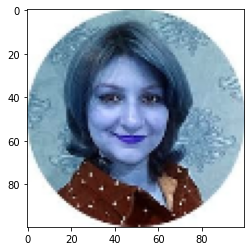

In [ ]:
# Showing results for one test image
test_image = x_test[0]
plt.imshow(test_image)

In [ ]:
y_pred = model.predict(x_test)
y_predicted = [np.rint(i) for i in y_pred]
print(y_predicted[0],y_test[0])

[0.] 0


In [ ]:
# Using Functional API
from keras.models import Model
input = Input(shape=(100,100,3))
con1 = Conv2D(16,3,padding='same', activation= 'relu')(input)
pool1 = MaxPooling2D()(con1)
con2 = Conv2D(16,3,padding='same', activation= 'relu')(pool1)
pool2 = MaxPooling2D()(con2)
con3 = Conv2D(16,3,padding='same', activation= 'relu')(pool2)
pool3 = MaxPooling2D()(con3)

flat = layers.Flatten()(pool3)
den1 = Dense(128,activation= 'relu')(flat)
output = Dense(1, activation= 'sigmoid')(den1)

model = Model(inputs=input, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 16)        2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 16)        2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 16)        0     

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10, validation_split=0.1)

Epoch 1/10
32/32 [==============================] - 7s 212ms/step - loss: 0.6817 - accuracy: 0.5696 - val_loss: 0.3738 - val_accuracy: 0.8649
Epoch 2/10
32/32 [==============================] - 7s 207ms/step - loss: 0.2712 - accuracy: 0.9159 - val_loss: 0.1072 - val_accuracy: 0.9820
Epoch 3/10
32/32 [==============================] - 7s 208ms/step - loss: 0.0917 - accuracy: 0.9721 - val_loss: 0.0648 - val_accuracy: 0.9730
Epoch 4/10
32/32 [==============================] - 7s 207ms/step - loss: 0.0599 - accuracy: 0.9752 - val_loss: 0.0385 - val_accuracy: 0.9820
Epoch 5/10
32/32 [==============================] - 7s 207ms/step - loss: 0.0808 - accuracy: 0.9756 - val_loss: 0.0304 - val_accuracy: 0.9820
Epoch 6/10
32/32 [==============================] - 7s 207ms/step - loss: 0.0280 - accuracy: 0.9908 - val_loss: 0.0408 - val_accuracy: 0.9820
Epoch 7/10
32/32 [==============================] - 7s 208ms/step - loss: 0.0160 - accuracy: 0.9957 - val_loss: 0.0238 - val_accuracy: 0.9910
Epoch 

In [ ]:
loss, accuracy = model.evaluate(x_test,y_test)
print(accuracy)

9/9 [==============================] - 1s 67ms/step - loss: 0.1452 - accuracy: 0.9748
0.9748201370239258


In [ ]:
# Showing results for the test image
y_pred = model.predict(x_test)
y_predicted = [np.rint(i) for i in y_pred]
print(y_predicted[0],y_test[0])

[0.] 0


Preprocessing of data to apply SKlearn models.

In [ ]:
data_transformed = np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]*data.shape[3]))

In [ ]:
data_transformed.shape

(1386, 30000)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
new_data = SelectKBest(chi2, k=10000).fit_transform(data_transformed, target)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(new_data,target,test_size=0.5,random_state=0)

In [ ]:
# PCA reduction to 10 components
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(x_train)
pca_x_train = pca.transform(x_train)
pca_x_test = pca.transform(x_test)

Model training and testing

In [ ]:
# Using MLP Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
model1 = MLPClassifier(alpha=0.001)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
mlp_acc = accuracy_score(y_test, y_pred1)
mlp_acc

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9393939393939394

In [ ]:
#Using SVM
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model2 = make_pipeline(StandardScaler(), SVC(probability=True))
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
svm_acc=accuracy_score(y_test, y_pred2)
svm_acc

0.9451659451659452

In [ ]:
#Naive bayes model
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
gauss_acc = accuracy_score(y_test, y_pred3)
gauss_acc

0.8210678210678211

In [ ]:
#Using perceptron model
from sklearn.linear_model import Perceptron
perc = Perceptron(max_iter=1000)
perc.fit(x_train,y_train)
y_pred_perc = perc.predict(x_test)
perc_acc = accuracy_score(y_test,y_pred_perc)
perc_acc

0.9422799422799423

In [ ]:
#Using Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
rf_acc = accuracy_score(y_test,y_pred_rf)
rf_acc

0.9797979797979798

In [ ]:
#Naive bayes model
from sklearn.naive_bayes import MultinomialNB
mult = MultinomialNB()
mult.fit(x_train,y_train)
y_pred_mult = mult.predict(x_test)
mult_acc = accuracy_score(y_test,y_pred_mult)
mult_acc

0.7907647907647908

Model training with PCA data reduction

In [ ]:
model4 = MLPClassifier(alpha=0.001)
model4.fit(pca_x_train, y_train)
y_pred4 = model4.predict(pca_x_test)
m4_acc = accuracy_score(y_test, y_pred4)
m4_acc

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.948051948051948

In [ ]:
model5 = make_pipeline(StandardScaler(), SVC(probability=True))
model5.fit(pca_x_train, y_train)
y_pred5 = model5.predict(pca_x_test)
m5_acc=accuracy_score(y_test, y_pred5)
m5_acc

0.9393939393939394

In [ ]:
model6 = GaussianNB()
model6.fit(pca_x_train, y_train)
y_pred6 = model6.predict(pca_x_test)
m6_acc = accuracy_score(y_test, y_pred6)
m6_acc

0.8975468975468975

Calculation of recall, precision, f1 score and accuracy of models

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
acc1 = accuracy_score(y_test, y_pred1)
prec1 = precision_score(y_test, y_pred1)
rec1 = recall_score(y_test, y_pred1)
f1_score1 = f1_score(y_test, y_pred1)

In [ ]:
acc2 = accuracy_score(y_test, y_pred2)
prec2 = precision_score(y_test, y_pred2)
rec2 = recall_score(y_test, y_pred2)
f1_score2 = f1_score(y_test, y_pred2)

In [ ]:
acc3 = accuracy_score(y_test, y_pred3)
prec3 = precision_score(y_test, y_pred3)
rec3 = recall_score(y_test, y_pred3)
f1_score3 = f1_score(y_test, y_pred3)

In [ ]:
acc4 = accuracy_score(y_test, y_pred4)
prec4 = precision_score(y_test, y_pred4)
rec4 = recall_score(y_test, y_pred4)
f1_score4 = f1_score(y_test, y_pred4)

In [ ]:
acc5 = accuracy_score(y_test, y_pred5)
prec5 = precision_score(y_test, y_pred5)
rec5 = recall_score(y_test, y_pred5)
f1_score5 = f1_score(y_test, y_pred5)

In [ ]:
acc6 = accuracy_score(y_test, y_pred6)
prec6 = precision_score(y_test, y_pred6)
rec6 = recall_score(y_test, y_pred6)
f1_score6 = f1_score(y_test, y_pred6)

In [ ]:
comp = [[acc1,prec1,rec1,f1_score1],[acc2,prec2,rec2,f1_score2],[acc3,prec3,rec3,f1_score3],[acc4,prec4,rec4,f1_score4],[acc5,prec5,rec5,f1_score5],[acc6,prec6,rec6,f1_score6]]
comp_df = pd.DataFrame(comp, columns=("Accuracy", "Precision", "Recall", "F1_score"), index=("MLP_Classifier","SVM","Naive_bayes","MLP_with_PCA","SVM_with_PCA","Naive_bayes_with_PCA"))
comp_df

,Accuracy,Precision,Recall,F1_score
MLP_Classifier,0.939394,0.926346,0.953353,0.939655
SVM,0.945166,0.932011,0.959184,0.945402
Naive_bayes,0.821068,0.815562,0.825073,0.820290
MLP_with_PCA,0.948052,0.942363,0.953353,0.947826
SVM_with_PCA,0.939394,0.928775,0.950437,0.939481
Naive_bayes_with_PCA,0.897547,0.869565,0.932945,0.900141


Comparison of models

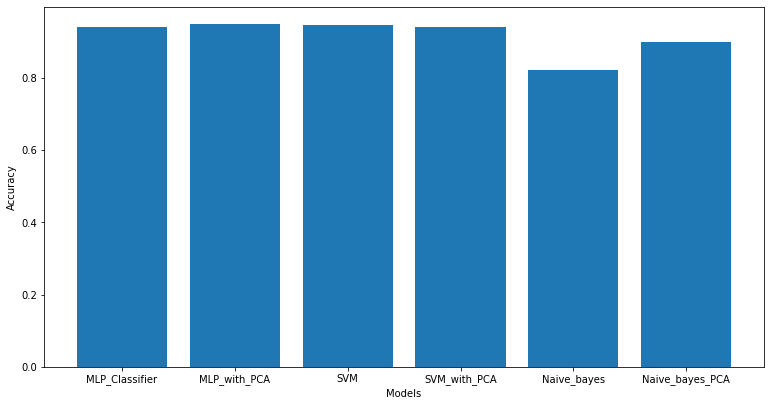

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
accuracies = [mlp_acc,m4_acc,svm_acc,m5_acc,gauss_acc,m6_acc]
models = ["MLP_Classifier","MLP_with_PCA","SVM","SVM_with_PCA","Naive_bayes","Naive_bayes_PCA"]
ax.bar(models,accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

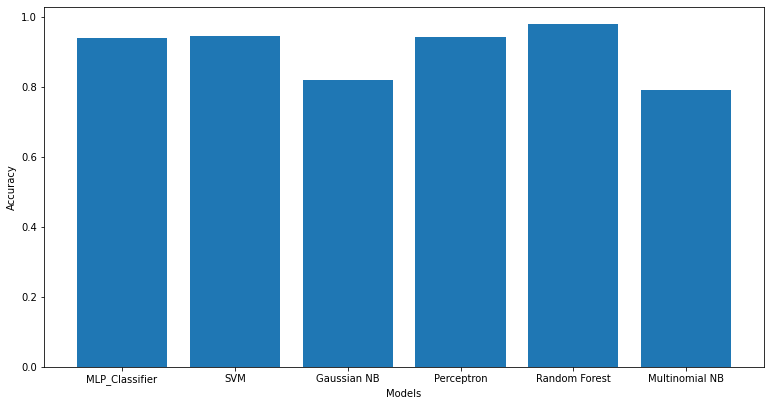

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
accuracies = [mlp_acc,svm_acc,gauss_acc,perc_acc,rf_acc,mult_acc]
models = ["MLP_Classifier","SVM","Gaussian NB","Perceptron","Random Forest","Multinomial NB"]
ax.bar(models,accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Perceptron model with PCA dimension reduction
perc.fit(pca_x_train, y_train)
y_pred7 = perc.predict(pca_x_test)
m7_acc = accuracy_score(y_test, y_pred6)
m7_acc

0.8975468975468975

In [ ]:
# Random forest with PCA reduction
rf.fit(pca_x_train, y_train)
y_pred6 = rf.predict(pca_x_test)
m8_acc = accuracy_score(y_test, y_pred6)
m8_acc

0.9365079365079365

Tuning hyperparameters of some models.

In [ ]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron(max_iter=1000,eta0=0.01)
perceptron.fit(x_train,y_train)
perceptron.score(x_test,y_test)

0.9422799422799423

In [ ]:
from sklearn.metrics import classification_report
y_pred = perceptron.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       350
           1       0.92      0.97      0.94       343

    accuracy                           0.94       693
   macro avg       0.94      0.94      0.94       693
weighted avg       0.94      0.94      0.94       693



In [ ]:
from sklearn.svm import SVC
svc = SVC(C=0.8,gamma='auto')
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

0.9033189033189033

In [ ]:
y_pred = svc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       350
           1       0.92      0.88      0.90       343

    accuracy                           0.90       693
   macro avg       0.90      0.90      0.90       693
weighted avg       0.90      0.90      0.90       693



Group Members: \
Chirag (B19CSE026)
Gautam Kumar (B19EE031)
